# **Perceptron de Múltiplas Camadas para Predição**

Utilize a rede neural perceptron de múltiplas camadas para fazer a predição de um passo, até predição de três passos, da série temporal: **x(n) = sen²(n) + cos(n+cos(n))**. Avalie o desempenho mostrando para cada caso os erros de predição.

**Importando as bibliotecas**

In [170]:
import numpy as np
import pandas as pd
import tensorflow as tf
import statistics
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
TEMPLATE = 'plotly_dark'

# **Parte 1 - Processamento dos Dados**

**Criando o dataset**

In [171]:
n_entrada = 10 
n_passos = 3 

function_set = [math.sin(x/10)**2 + math.cos(x/10 + math.cos(x/10)) for x in range(0,200+n_passos)]
treina_predicao = [([function_set[x-i] for i in range(1, n_entrada+1)], [function_set[x+j] for j in range(0, n_passos)]) for x in range(n_entrada, len(function_set)-n_passos+1)]

X = []
Y = []
for x, y in treina_predicao:
  X.append(x)
  Y.append(y)

X = np.array(X)
Y = np.array(Y)

In [172]:
print(X[:5])

[[0.66276758 0.58862161 0.52077243 0.46376941 0.42186269 0.39879416
  0.39758584 0.42033277 0.46800948 0.54030231]
 [0.73856271 0.66276758 0.58862161 0.52077243 0.46376941 0.42186269
  0.39879416 0.39758584 0.42033277 0.46800948]
 [0.81144992 0.73856271 0.66276758 0.58862161 0.52077243 0.46376941
  0.42186269 0.39879416 0.39758584 0.42033277]
 [0.87713533 0.81144992 0.73856271 0.66276758 0.58862161 0.52077243
  0.46376941 0.42186269 0.39879416 0.39758584]
 [0.93174187 0.87713533 0.81144992 0.73856271 0.66276758 0.58862161
  0.52077243 0.46376941 0.42186269 0.39879416]]


In [173]:
print(Y[:5])

[[0.73856271 0.81144992 0.87713533]
 [0.81144992 0.87713533 0.93174187]
 [0.87713533 0.93174187 0.97194035]
 [0.93174187 0.97194035 0.99505537]
 [0.97194035 0.99505537 0.99914324]]


**Dividindo o conjunto de dados em conjunto de treinamento e conjunto de teste**

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [175]:
print('Tamanho do conjunto de treinamento:',len(X_train))
print('Tamanho do conjunto de teste:',len(X_test))

Tamanho do conjunto de treinamento: 152
Tamanho do conjunto de teste: 39


# **Parte 2 - Construção da Rede**

In [176]:
model = tf.keras.models.Sequential([
               tf.keras.layers.Dense(units=10, activation = 'relu', input_dim = 10),
               tf.keras.layers.Dense(units=10, activation = 'relu'),

               tf.keras.layers.Dense(units=n_passos, activation = 'linear')])

# **Parte 3 - Treinando a Rede**

In [177]:
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])

In [178]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 10)                110       
                                                                 
 dense_31 (Dense)            (None, 10)                110       
                                                                 
 dense_32 (Dense)            (None, 3)                 33        
                                                                 
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


In [179]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=1)

Epoch 1/200
13/13 [==============================] - 0s 12ms/step - loss: 0.6609 - mean_squared_error: 0.6306 - val_loss: 0.6370 - val_mean_squared_error: 0.5733
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6026 - mean_squared_error: 0.5304 - val_loss: 0.5968 - val_mean_squared_error: 0.5123
Epoch 3/200
13/13 [==============================] - 0s 3ms/step - loss: 0.5535 - mean_squared_error: 0.4555 - val_loss: 0.5717 - val_mean_squared_error: 0.4698
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 0.5212 - mean_squared_error: 0.4056 - val_loss: 0.5572 - val_mean_squared_error: 0.4453
Epoch 5/200
13/13 [==============================] - 0s 4ms/step - loss: 0.5065 - mean_squared_error: 0.3736 - val_loss: 0.5483 - val_mean_squared_error: 0.4303
Epoch 6/200
13/13 [==============================] - 0s 3ms/step - loss: 0.4960 - mean_squared_error: 0.3529 - val_loss: 0.5384 - val_mean_squared_error: 0.4148
Epoch 7/200
13/13 [==============

# **Parte 4 - Avaliando o Modelo**



###**Predição de um passo**



***Gráfico do Erro Médio para um Passo***

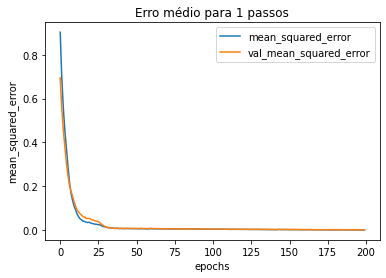

In [167]:
plt.plot(history.history["mean_squared_error"], label="mean_squared_error")
plt.plot(history.history["val_mean_squared_error"], label="val_mean_squared_error")
plt.title('Erro médio para ' + str(n_passos) + ' passos')
plt.ylabel('mean_squared_error')
plt.xlabel('epochs')
plt.legend()

**Gráfico das Predições para um Passo**

In [168]:
x2=[]
for i in range(0,210-n_entrada):
  passos = 0
  for y in range(0,n_passos):
    x2.append((i+n_entrada+passos)/10)
    passos +=1

y_pred = model.predict(X)
previsoes =[]
for i in y_pred:
  for x in i:
    previsoes.append(x)

x=[]
for i in range(0,200):
  x.append(i/10)
y=[]
for i in x:
  y.append(math.sin(i)**2 + math.cos(i + math.cos(i)))

In [169]:
fig = go.Figure(data=go.Scatter(x=x,
                                y=y,
                                mode="lines",
                                name="expected"))

fig.add_trace(go.Scatter(x=x2,
                         y=previsoes,
                         mode="markers",
                         name="pred"))

fig.update_layout(title=f"Predição para {n_passos} passos")

fig.show()



###**Predição de dois passos**



***Gráfico do Erro Médio para Dois Passos***

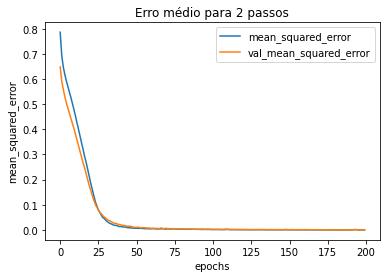

In [154]:
plt.plot(history.history["mean_squared_error"], label="mean_squared_error")
plt.plot(history.history["val_mean_squared_error"], label="val_mean_squared_error")
plt.title('Erro médio para ' + str(n_passos) + ' passos')
plt.ylabel('mean_squared_error')
plt.xlabel('epochs')
plt.legend()

**Gráfico das Predições para Dois Passos**

In [155]:
x2=[]
for i in range(0,201-n_entrada):
  passos = 0
  for y in range(0,n_passos):
    x2.append((i+n_entrada+passos)/10)
    passos +=1

y_pred = model.predict(X)
previsoes =[]
for i in y_pred:
  for x in i:
    previsoes.append(x)

x=[]
for i in range(0,1000):
  x.append(i/50)
y=[]
for i in x:
  y.append(math.sin(i)**2 + math.cos(i + math.cos(i)))

In [156]:
fig = go.Figure(data=go.Scatter(x=x,
                                y=y,
                                mode="lines",
                                name="expected"))

fig.add_trace(go.Scatter(x=x2,
                         y=previsoes,
                         mode="markers",
                         name="pred"))

fig.update_layout(title=f"Predição para {n_passos} passos")

fig.show()



###**Predição de três passos**



***Gráfico do Erro Médio para Três Passos***

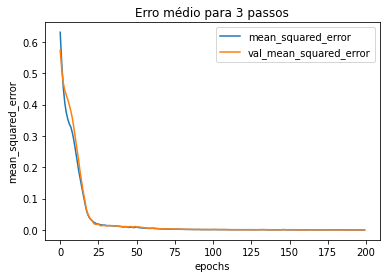

In [180]:
plt.plot(history.history["mean_squared_error"], label="mean_squared_error")
plt.plot(history.history["val_mean_squared_error"], label="val_mean_squared_error")
plt.title('Erro médio para ' + str(n_passos) + ' passos')
plt.ylabel('mean_squared_error')
plt.xlabel('epochs')
plt.legend()

**Gráfico das Predições para Três Passos**

In [181]:
x2=[]
for i in range(0,201-n_entrada):
  passos = 0
  for y in range(0,n_passos):
    x2.append((i+n_entrada+passos)/10)
    passos +=1

y_pred = model.predict(X)
previsoes =[]
for i in y_pred:
  for x in i:
    previsoes.append(x)

x=[]
for i in range(0,1000):
  x.append(i/50)
y=[]
for i in x:
  y.append(math.sin(i)**2 + math.cos(i + math.cos(i)))

In [185]:
fig = go.Figure(data=go.Scatter(x=x,
                                y=y,
                                mode="lines",
                                name="expected"))

fig.add_trace(go.Scatter(x=x2,
                         y=previsoes,
                         mode="markers",
                         name="pred"))

fig.update_layout(title=f"Predição para {n_passos} passos")

fig.show()